In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("train.csv")

# inital removal of redundant data

dataset.pop('Name')
dataset.pop('Cabin')
dataset.pop('Ticket')

X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

print(dataset)
print(X[0])
print(y)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

(891, 7)
[0.0 1.0 0.0 0.0 1.0 0.0 -0.5024451714361923 3 22.0 1 0]


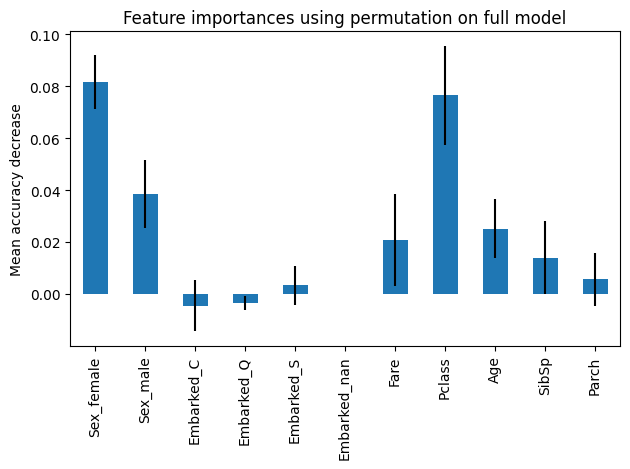

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
print(X.shape)

ct = ColumnTransformer(
    transformers=[
        ('encoder_sex', OneHotEncoder(), [1]),
        ('encoder_embarked', OneHotEncoder(), [6]),
        ('scaler', StandardScaler(), [5])
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)
X = np.array(ct.fit_transform(X))
print(X[0])
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# print(X[0])

# ct = ColumnTransformer(transformers=[('scaler', StandardScaler(), [6])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# print(X[0])

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# print(X[0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
encoder_sex = ct.named_transformers_['encoder_sex']
encoder_embarked = ct.named_transformers_['encoder_embarked']


sex_feature_names = encoder_sex.get_feature_names_out(['Sex'])
embarked_feature_names = encoder_embarked.get_feature_names_out(['Embarked'])

original_feature_names = ['Pclass', 'Age', 'SibSp', 'Parch']
feature_names = np.concatenate((sex_feature_names, embarked_feature_names, ['Fare'], original_feature_names))
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


In [5]:
# Additional pop
dataset.pop('Parch')
dataset.pop('Embarked')

#import test
dataset_test = pd.read_csv("test.csv")
dataset_test.pop('Name')
dataset_test.pop('Cabin')
dataset_test.pop('Ticket')
dataset_test.pop('Parch')
dataset_test.pop('Embarked')

#Reassign data
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

print(dataset)
print(dataset_test)

X_test_f = dataset_test.iloc[:, 1:].values



print(X.shape)
print(X_test.shape)
print(" ")

#Missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 2:5] = imputer.fit_transform(X[:, 2:5])
X_test_f[:, 2:5] = imputer.transform(X_test_f[:, 2:5])

ct = ColumnTransformer(
    transformers=[
        ('encoder_sex', OneHotEncoder(), [1]),
        ('scaler', StandardScaler(), [4])
    ],
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))
X_test_f =  np.array(ct.fit_transform(X_test_f))


print(X.shape)
print(X_test)

print(" ")
print(X_test.shape)
print(X)


     PassengerId  Survived  Pclass     Sex   Age  SibSp     Fare
0              1         0       3    male  22.0      1   7.2500
1              2         1       1  female  38.0      1  71.2833
2              3         1       3  female  26.0      0   7.9250
3              4         1       1  female  35.0      1  53.1000
4              5         0       3    male  35.0      0   8.0500
..           ...       ...     ...     ...   ...    ...      ...
886          887         0       2    male  27.0      0  13.0000
887          888         1       1  female  19.0      0  30.0000
888          889         0       3  female   NaN      1  23.4500
889          890         1       1    male  26.0      0  30.0000
890          891         0       3    male  32.0      0   7.7500

[891 rows x 7 columns]
     PassengerId  Pclass     Sex   Age  SibSp      Fare
0            892       3    male  34.5      0    7.8292
1            893       3  female  47.0      1    7.0000
2            894       2    

In [6]:
#Support Vector Machine

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#accuracy vs test dataset
#kernel linear = 0.76%
#kernel rbf = 0.7%
#kernel rbc gamma = 0.1 = 0.73%
#kernel rbc  gamma=0.6, C=100 = 0.9%
#kernel = 'poly', gamma=0.85, C=15 = 0.76%
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', gamma=0.85, C=15)
print(X.shape)
print(y.shape)
classifier.fit(X, y)

(891, 6)
(891,)


SVC(C=15, gamma=0.85, kernel='poly')

In [7]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

print(X_test.shape)
y_pred_f = classifier.predict(X_test_f)
print(y_pred_f)

with open('submission.csv', 'w') as file:
    file.write('PassengerId,Survived\n')
    for i in range (0, len(y_pred_f)):
        file.write(str(892+i))
        file.write(',')
        file.write(str(y_pred_f[i]))
        file.write('\n')

[[43  8]
 [14 25]]
0.7555555555555555
(90, 6)
[0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
